In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Könyvtárak importálása

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:
# Adatok betöltése

In [ ]:
data_path = "/content/data.npy"
labels_path = "/content/labels.npy"

In [ ]:
import numpy as np
data = np.load(data_path)
labels = np.load(labels_path)

In [ ]:
# Pixelek normalizálása

In [ ]:
data = data / 255.0

In [ ]:
# Adatok ellenőrzése

In [ ]:
print(data.shape)
print(labels.shape)

(4000, 224, 224, 3)
(4000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Képek laposítása (RandomOverSampler csak 2D-t kezel)

In [ ]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))  # Flatten

In [ ]:
# RandomOverSampler alkalmazása

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train)

In [ ]:
# Visszaalakítás az eredeti dimenziókra

In [ ]:
X_train_resampled = X_train_resampled.reshape((-1, 224, 224, 3))

In [ ]:
# Osztályeloszlás ellenőrzése

In [ ]:
from collections import Counter
print("Eredeti osztályeloszlás:", Counter(y_train))
print("Kiegyensúlyozott osztályeloszlás:", Counter(y_train_resampled))

Eredeti osztályeloszlás: Counter({0: 2361, 2: 486, 1: 212, 3: 76, 4: 65})
Kiegyensúlyozott osztályeloszlás: Counter({0: 2361, 1: 2361, 4: 2361, 2: 2361, 3: 2361})


In [ ]:


import numpy as np

# Példa fájlnevek és útvonalak
train_path = '/content/drive/My Drive/x_train.npy'
test_path = '/content/drive/My Drive/x_test.npy'
train_label = '/content/drive/My Drive/y_train.npy'
test_label = '/content/drive/My Drive/y_test.npy'
train_label_resampled = '/content/drive/My Drive/y_train_reshaped.npy'
train_path_resampled = '/content/drive/My Drive/x_train_reshaped.npy'

# Numpy tömbök mentése
np.save(train_path, X_train)  # train_array az adataid numpy tömbje
np.save(test_path, X_test)   # test_array az adataid numpy tömbje
np.save(train_label, y_train)  # train_array az adataid numpy tömbje
np.save(test_label, y_test)   # test_array az adataid numpy tömbje
np.save(train_label_resampled, y_train_resampled)  # train_array az adataid numpy tömbje
np.save(train_path_resampled, X_train_resampled)   # test_array az adataid numpy tömbje

In [1]:
import numpy as np
X_train = np.load('/content/drive/My Drive/x_train.npy')
y_train = np.load('/content/drive/My Drive/y_train.npy')

In [2]:
X_test = np.load('/content/drive/My Drive/x_test.npy')
y_test = np.load('/content/drive/My Drive/y_test.npy')

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    fill_mode='constant'
)
test_datagen = ImageDataGenerator()

In [6]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,796,677 (182.33 MB)

 Trainable params: 47,796,677 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modell betanítása
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=1,
    validation_data=test_datagen.flow(X_test, y_test, batch_size=32),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

  1/100 ━━━━━━━━━━━━━━━━━━━━ 11:13 7s/step - accuracy: 0.6875 - loss: 1.3578

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Teszt veszteség: {test_loss}')
print(f'Teszt pontosság: {test_acc}')

25/25 [==============================] - 2s 73ms/step - loss: 1.4158 - accuracy: 0.5150
Teszt veszteség: 1.4158498048782349
Teszt pontosság: 0.5149999856948853


25/25 [==============================] - 2s 79ms/step
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       600
           1       0.05      0.07      0.06        55
           2       0.23      0.48      0.31       115
           3       0.05      0.06      0.06        16
           4       0.08      0.14      0.11        14

    accuracy                           0.52       800
   macro avg       0.24      0.27      0.24       800
weighted avg       0.63      0.52      0.56       800



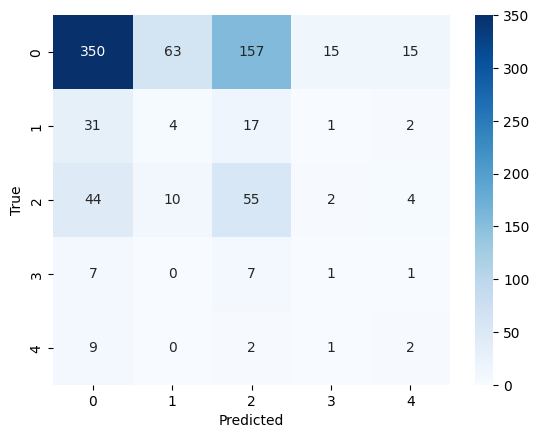

In [23]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Klaszterezési jelentés
print(classification_report(y_test, y_pred_classes))

# Zűrzavar-mátrix (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model.save("saved_model/my_model")

In [25]:
model.save('/content/drive/My Drive/11.22/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp -r saved_model/my_model /content/drive/MyDrive/

In [ ]:
import json

# Metrikák mentése egy dictionary-ben
metrics = {
    "train_accuracy": history.history["accuracy"],
    "train_loss": history.history["loss"],
    "val_accuracy": history.history["val_accuracy"],
    "val_loss": history.history["val_loss"]
}

# JSON fájlba írás
with open("metrics.json", "w") as f:
    json.dump(metrics, f)

# Feltöltés Google Drive-ba
!cp metrics.json /content/drive/MyDrive/

In [26]:
import numpy as np

# Példa fájlnevek és útvonalak
train_path = '/content/drive/My Drive/x_train.npy'
test_path = '/content/drive/My Drive/x_test.npy'
train_label = '/content/drive/My Drive/y_train.npy'
test_label = '/content/drive/My Drive/y_test.npy'
train_label_resampled = '/content/drive/My Drive/y_train_reshaped.npy'
train_path_resampled = '/content/drive/My Drive/x_train_reshaped.npy'

# Numpy tömbök mentése
np.save(train_path, X_train)  # train_array az adataid numpy tömbje
np.save(test_path, X_test)   # test_array az adataid numpy tömbje
np.save(train_label, y_train)  # train_array az adataid numpy tömbje
np.save(test_label, y_test)   # test_array az adataid numpy tömbje
np.save(train_label_resampled, y_train_resampled)  # train_array az adataid numpy tömbje
np.save(train_path_resampled, X_train_resampled)   # test_array az adataid numpy tömbje